In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

from datetime import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
folders=os.listdir( '245_data')
print(folders)

['phi', 'q', 'gt', 'theta', 'sin', 'div', 'cos', 'G', 'T', 'j', 'f', 'u', '!', 'times', 'C', '8', 'pm', 'forward_slash', 'p', 'log', ']', 'sum', 'N', '5', 'Delta', 'H', 'tan', 'S', 'prime', 'ldots', 'rightarrow', 'neq', '-', 'M', 'A', 'e', 'l', 'gamma', 'exists', 'k', '4', ',', 'in', 'pi', '=', '0', '3', 'leq', 'd', '+', 'alpha', '1', 'X', 'lim', '{', '7', 'lambda', '}', 'ascii_124', 'beta', 'mu', 'forall', 'sigma', '9', 'o', '2', 'b', 'R', 'geq', 'y', 'w', '[', '(', 'lt', ')', 'z', '6', 'sqrt', 'infty', 'v', 'int', 'i']


In [3]:
import cv2

if os.path.exists('245_data.csv'):
    df = pd.read_csv('245_data.csv', low_memory=False)
    del df['Unnamed: 0']
else:
    data = []
    label = []

    for each in folders:
        file_ct=0
        currentFolder = '245_data/' + each
        for i, file in enumerate(os.listdir(currentFolder)):
            if file_ct > 5000:
                break
            im= cv2.imread((os.path.join(currentFolder, file)))
            img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            #resize
            resized_image = cv2.resize(img, (8,8))
            #normalization
            img = img = np.array(resized_image)/255
        
            img = img.ravel()
            img = img.tolist()
        
            data.append(img)
            label.append(each)
            file_ct+=1
    df = pd.DataFrame(data)
    df["label"] = label
    df.to_csv('245_data.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,1.0,1.0,1.0,0.988235,0.811765,0.996078,1.000000,1.0,1.0,1.000000,...,1.0,1.0,0.992157,0.996078,0.996078,1.0,1.0,1.0,1.0,phi
1,1.0,1.0,1.0,1.000000,0.996078,0.996078,1.000000,1.0,1.0,1.000000,...,1.0,1.0,1.000000,0.560784,1.000000,1.0,1.0,1.0,1.0,phi
2,1.0,1.0,1.0,0.996078,0.866667,1.000000,1.000000,1.0,1.0,0.996078,...,1.0,1.0,1.000000,0.560784,1.000000,1.0,1.0,1.0,1.0,phi
3,1.0,1.0,1.0,1.000000,0.996078,0.996078,0.996078,1.0,1.0,1.000000,...,1.0,1.0,0.996078,0.996078,1.000000,1.0,1.0,1.0,1.0,phi
4,1.0,1.0,1.0,1.000000,1.000000,0.996078,1.000000,1.0,1.0,1.000000,...,1.0,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,phi


In [4]:
df.shape

(198717, 65)

In [5]:
numeric_data=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
alpha_data=['A', 'b','C','d', 'e', 'f', 'G', 'H', 'i', 'j', 'k', 'l', 'M', 'mu', 'N','o', 'p','q', 'R','S','T', 'u', 'v', 'w', 'X', 'y', 'z']
symbol_data=['!', '(', ')', '+', ',', '-','=','alpha', 'ascii_124', 'beta', 'cos', 'Delta', 'div','exists', 'forall', 'forward_slash','gamma', 'geq', 'gt', 'in', 'infty', 'int','lambda', 'ldots', 'leq', 'lim', 'log', 'lt','mu', 'neq', 'phi', 'pi', 'pm', 'prime', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', '[', ']', '{', '}']

EDA

Text(0, 0.5, 'Count')

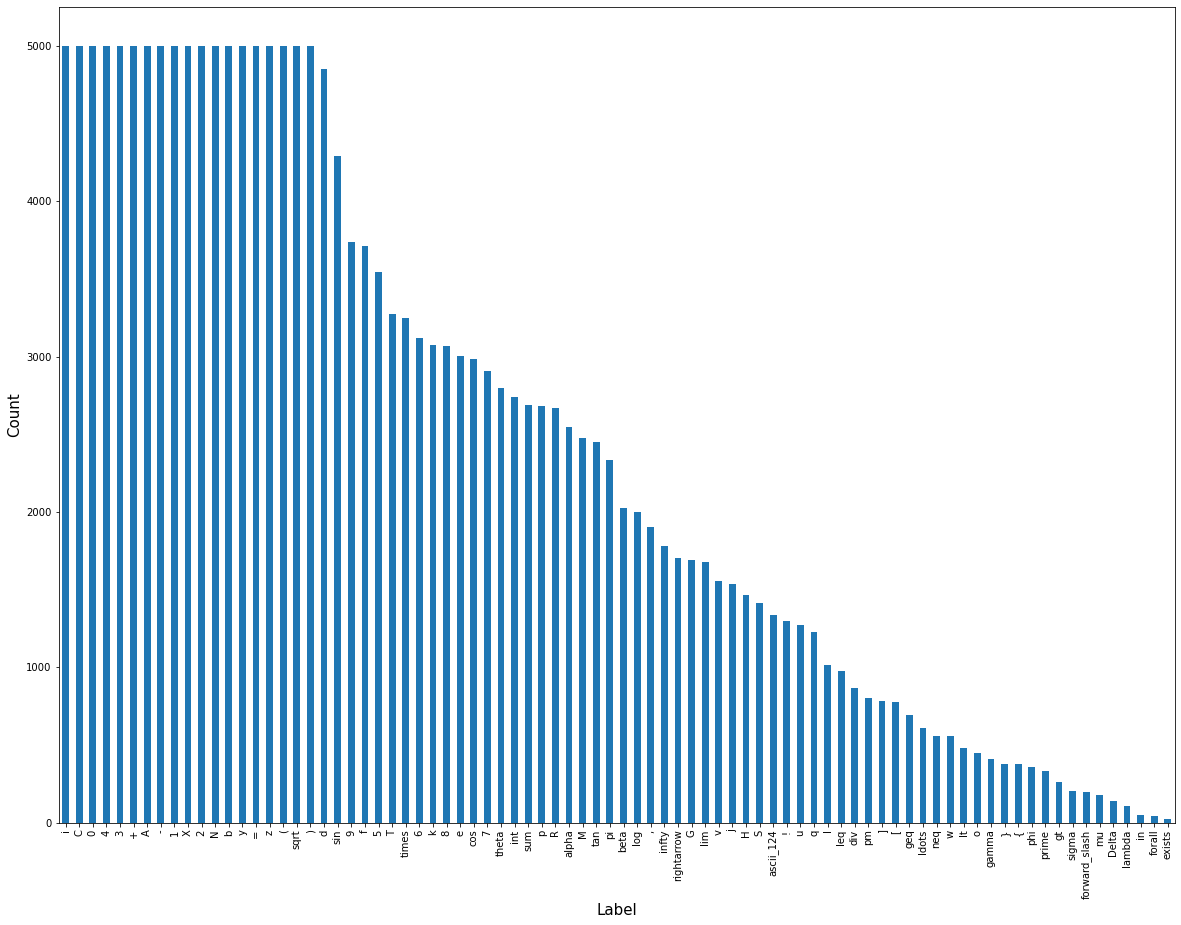

In [6]:
plt.figure(figsize=(20,15))
pd.value_counts(df['label']).plot.bar()
plt.xlabel('Label', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [7]:
#original image instance
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
i=0
original_image=[]
path = r'245_data/1/1_2.jpg'
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image.append(img_to_array(img))


#processed image instance
processed_image=[]
im= cv2.imread(path)
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(img, (8,8))   
resized_image = resized_image.astype('float32') / 255
processed_image.append(img_to_array(resized_image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


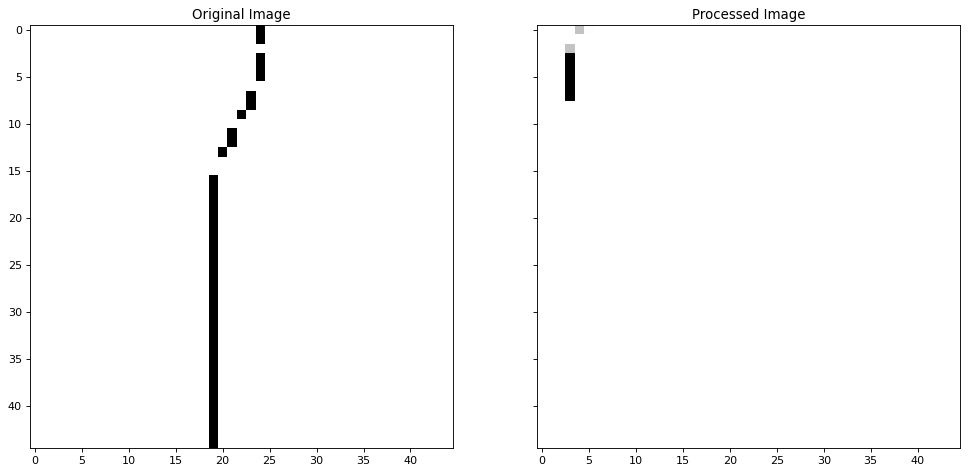

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80, sharex=True, sharey=True)


ax[1].imshow(np.squeeze(processed_image),cmap='gray')
ax[0].imshow(np.squeeze(original_image))

ax[0].title.set_text('Original Image')
ax[1].title.set_text('Processed Image')

Prepare dataset to train

In [9]:
#remove outlier
df1 = df[df.groupby(['label'])['label'].transform('count') > 2000]
df1.shape

(167249, 65)

In [10]:
len(set(df1.label))

43

In [11]:
data=df1.iloc[:,:-1]
label=df1.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit_transform(label)
df1['label'] = label_encoded

#60% train, 20% test, 20% validation
train, test = train_test_split(df1, test_size=0.2, random_state=22, shuffle=True)
train, val = train_test_split(train, test_size=0.25, random_state=22)

/tmp/ipykernel_41998/1237765912.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = label_encoded


In [12]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
97110,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,1.000000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,14
184396,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,36
93461,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,14
174827,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,1.0,1.0,1.0,0.435294,0.996078,0.443137,0.690196,0.992157,1.0,42
57549,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,...,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,38


In [13]:
def balance(df):
    groupby = df.groupby('label')
    df = groupby.apply(lambda x: x.sample(groupby.size().max(), replace=True).reset_index(drop=True))
    del df['label']
    df = df.reset_index()
    del df['level_1']
    df = df.sample(frac=1)
    return df

train = balance(train)

print(f'train: {len(train)}, validation: {len(val)}, test: {len(test)}')

train: 133128, validation: 33450, test: 33450


In [14]:
train.head()

,label,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
130872,42,1.000000,0.996078,0.996078,0.992157,0.996078,0.996078,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
14411,4,0.996078,0.705882,1.000000,0.811765,0.313725,0.313725,0.686275,0.996078,0.996078,...,1.000000,1.0,0.996078,0.313725,0.996078,0.686275,1.000000,1.000000,1.0,1.0
14904,4,0.992157,1.000000,0.996078,0.996078,1.000000,1.000000,0.992157,1.000000,0.686275,...,0.133333,1.0,1.000000,1.000000,0.996078,0.996078,0.439216,0.819608,1.0,1.0
6344,2,1.000000,1.000000,1.000000,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.941176,0.992157,1.0,1.0
96320,31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.992157,1.0,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,1.0,1.0


In [15]:
train.groupby('label')['label'].count()

label
0     3096
1     3096
2     3096
3     3096
4     3096
5     3096
6     3096
7     3096
8     3096
9     3096
10    3096
11    3096
12    3096
13    3096
14    3096
15    3096
16    3096
17    3096
18    3096
19    3096
20    3096
21    3096
22    3096
23    3096
24    3096
25    3096
26    3096
27    3096
28    3096
29    3096
30    3096
31    3096
32    3096
33    3096
34    3096
35    3096
36    3096
37    3096
38    3096
39    3096
40    3096
41    3096
42    3096
Name: label, dtype: int64

In [16]:
y_train = train['label'].to_numpy()
del train['label']
X_train = train.to_numpy()

y_val = val['label'].to_numpy()
del val['label']
X_val = val.to_numpy()

y_test = test['label'].to_numpy()
del test['label']
X_test = test.to_numpy()

In [17]:
print('Training dataset contains: ', X_train.shape, ' data')
print('Testing dataset contains: ', X_test.shape, ' data')
print('Validation dataset contains: ', X_val.shape, ' data')

Training dataset contains:  (133128, 64)  data
Testing dataset contains:  (33450, 64)  data
Validation dataset contains:  (33450, 64)  data


In [14]:
def svm_model(X_train, X_test, y_train, y_test):
    from sklearn import svm
    train_start = dt.now()
    svm_classifier = svm.SVC(kernel='rbf',gamma=0.001,C=5, max_iter=100)
    svm_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - train_start).seconds
    
    predict_start=dt.now()
    y_pred = svm_classifier.predict(X_test)
    predict_time = (predict_start.now() - predict_start).seconds
    
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['SVM',traing_time,predict_time,accuracy])
    
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

def linear_svm_model(X_train, X_test, y_train, y_test):
    from sklearn import svm
    train_start = dt.now()
    svm_classifier = svm.LinearSVC(max_iter=100)
    svm_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - train_start).seconds
    
    predict_start=dt.now()
    y_pred = svm_classifier.predict(X_test)
    predict_time = (predict_start.now() - predict_start).seconds
    
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['LinearSVM',traing_time,predict_time,accuracy])
    
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    
def gaussian_naive_bayes(X_train, X_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    
    train_start = dt.now()
    GNB_classifier = GaussianNB()
    GNB_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - train_start).seconds
    
    predict_start=dt.now()
    y_pred = GNB_classifier.predict(X_test)
    predict_time = (predict_start.now() - predict_start).seconds
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['NB',traing_time,predict_time,accuracy])

def decision_tree(X_train, X_test, y_train, y_test):
    from sklearn import tree
    
    train_start = dt.now()
    dt_classifier = tree.DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - train_start).seconds
    
    predict_start=dt.now()
    y_pred = dt_classifier.predict(X_test)
    predict_time = (predict_start.now() - predict_start).seconds
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['DT',traing_time,predict_time,accuracy])

def random_forest(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    
    train_start = dt.now()
    RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
    RF_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - train_start).seconds
    
    predict_start=dt.now()
    y_pred = RF_classifier.predict(X_test)
    predict_time = (predict_start.now() - predict_start).seconds
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['RF',traing_time,predict_time,accuracy])

def k_nearest_neighbors(X_train, X_test, y_train, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    
    train_start = dt.now()
    KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', algorithm='kd_tree')
    KNN_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - train_start).seconds
    
    predict_start=dt.now()
    y_pred = KNN_classifier.predict(X_test)
    predict_time = (predict_start.now() - predict_start).seconds
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['KNN',traing_time,predict_time,accuracy])

def stochastic_gradient_decend(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import SGDClassifier
    
    train_start = dt.now()
    sgd_classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
    sgd_classifier.fit(X_train, y_train)
    traing_time = (train_start.now() - train_start).seconds
    
    predict_start=dt.now()
    y_pred = sgd_classifier.predict(X_test)
    predict_time = (predict_start.now() - predict_start).seconds
    accuracy = accuracy_score(y_test,y_pred)*100
    
    performance_result.append(['GD',traing_time,predict_time,accuracy])

In [15]:
import sklearn.metrics as metrics

evaluation_col = ["Model","training duration", "predicting duration", "accuracy score"]
performance_result=[]

from joblib import parallel_backend

with parallel_backend('threading', n_jobs=12):
    #print('svm_model')
    #svm_model(X_train, X_test, y_train, y_test)
    
    print('linear_svm_model')
    linear_svm_model(X_train, X_test, y_train, y_test)

    print('gaussian_naive_bayes')
    gaussian_naive_bayes(X_train, X_test, y_train, y_test)

    print('decision_tree')
    decision_tree(X_train, X_test, y_train, y_test)

    print('random_forest')
    random_forest(X_train, X_test, y_train, y_test)

    print('k_nearest_neighbors')
    k_nearest_neighbors(X_train, X_test, y_train, y_test)

    print('stochastic_gradient_decend')
    stochastic_gradient_decend(X_train, X_test, y_train, y_test)

linear_svm_model


/home/zyan/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


gaussian_naive_bayes
decision_tree
random_forest
k_nearest_neighbors
stochastic_gradient_decend


/home/zyan/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [16]:
eva_df = pd.DataFrame(performance_result, columns=evaluation_col)
eva_df

,Model,training duration,predicting duration,accuracy score
0,LinearSVM,150,0,24.448430
1,NB,0,0,22.517190
2,DT,1,0,88.517190
3,RF,0,0,24.134529
4,KNN,0,125,57.243647
5,GD,0,0,21.665172


KNN + SVM

In [18]:
import numpy as np
import faiss


class FaissKNeighbors:
    def __init__(self, k=5):
        self.index = None
        self.y = None
        self.k = k

    def fit(self, X, y):
        self.index = faiss.IndexFlatL2(X.shape[1])
        self.index.add(X.copy(order='C').astype(np.float32))
        self.y = y

    def predict(self, X):
        X = X.copy(order='C')
        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
        votes = self.y[indices]
        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
        return predictions
    
    def kneighbors(self, X, n_neighbors):
        X = X.copy(order='C')
        return self.index.search(X.astype(np.float32), k=n_neighbors)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = FaissKNeighbors(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)*100

60.884902840059794

In [ ]:
# num of classes based

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_classes = len(set(df1.label))

def transform_X(X, y, n_neighbors):
    # neigh_dist, neigh_ind
    distances, indices = knn.kneighbors(X, n_neighbors=n_neighbors)
    votes = y[indices]
    X_transform = [np.bincount(x, minlength=n_classes) for x in votes]
    return np.vstack(X_transform)

for n_neighbors in [5, 10, 15, 20]:
    print(f'n_neighbors: {n_neighbors}, transforming X_train')
    X_train_svm = transform_X(X_train, y_train, n_neighbors)
    
    print(f'n_neighbors: {n_neighbors}, transforming X_test')
    X_test_svm = transform_X(X_test, y_train, n_neighbors)

    for max_iter in [100, 500, 1000, 2000]:
        for penalty in ['l2', 'l1']:
            for kernel in ["LinearSVC", "SVC"]:
                if kernel == "SVC" and penality == 'l1':
                    continue
                print(f'penalty: {penalty}, max_iter: {max_iter}, kernel: {kernel}, training SVM')
                train_start = dt.now()
                if kernel == "LinearSVC":
                    svm = make_pipeline(StandardScaler(), LinearSVC(max_iter=max_iter, penalty=penalty, tol=1e-5))
                else:
                    svm = make_pipeline(StandardScaler(), SVC(max_iter=max_iter, tol=1e-5))
                svm.fit(X_train_svm, y_train)
                traing_time = (train_start.now() - train_start).seconds
                print(f'traing_time: {traing_time}')

                accuracy = svm.score(X_test_svm, y_test)
                print(f'accuracy: {accuracy}')

n_neighbors: 5, transforming X_train


In [ ]:
# average distance based

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_classes = len(set(df1.label))

def transform_X(X, y, n_neighbors):
    # neigh_dist, neigh_ind
    distances, indices = knn.kneighbors(X, n_neighbors=n_neighbors)
    votes = y[indices]
    X_transform = []
    for distance, vote in zip(distances, votes):
        d = [0 for _ in range(n_classes)]
        c = [0 for _ in range(n_classes)]
        for dd, v in zip(distance, vote):
            c[v] += 1
            d[v] += dd
#         for i in range(len(d)):
#             if c[i] == 0:
#                 continue
#             d[i] /= c[i]
        X_transform.append(np.array(d))
    return np.vstack(X_transform)

for n_neighbors in [5, 10, 15, 20]:
    print(f'n_neighbors: {n_neighbors}, transforming X_train')
    X_train_svm = transform_X(X_train, y_train, n_neighbors)
    
    print(f'n_neighbors: {n_neighbors}, transforming X_test')
    X_test_svm = transform_X(X_test, y_train, n_neighbors)

    for max_iter in [100, 500, 1000, 2000]:
        for penalty in ['l2', 'l1']:
            for kernel in ["LinearSVC", "SVC"]:
                if kernel == "SVC" and penality == 'l1':
                    continue
                print(f'penalty: {penalty}, max_iter: {max_iter}, kernel: {kernel}, training SVM')
                train_start = dt.now()
                if kernel == "LinearSVC":
                    svm = make_pipeline(StandardScaler(), LinearSVC(max_iter=max_iter, penalty=penalty, tol=1e-5))
                else:
                    svm = make_pipeline(StandardScaler(), SVC(max_iter=max_iter, tol=1e-5))
                svm.fit(X_train_svm, y_train)
                traing_time = (train_start.now() - train_start).seconds
                print(f'traing_time: {traing_time}')

                accuracy = svm.score(X_test_svm, y_test)
                print(f'accuracy: {accuracy}')

n_neighbors: 5, transforming X_train
n_neighbors: 5, transforming X_test
penalty: l2, max_iter: 100, training SVM


/home/zyan/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


traing_time: 194
accuracy: 0.12337817638266069
penalty: l2, max_iter: 500, training SVM
